In [1]:
from enum import Enum
from sympy.ntheory import isprime
import matplotlib.pyplot as plt
import math

In [2]:
# Plot numbers in spiral shape
# Start from center with value 1, following anti-clockwise direction
# Prime numbers will be marked as red
def draw(size, edges, lines=True):
    
    def get_rotation(edges):
        return 180 - (edges - 2) / edges * 180
    
    def mark_prime(coordinate):
        plt.plot(coordinate[0], coordinate[1], marker='o', markersize=4, color="red")

    def get_next_point(coordinate, direction):
        x, y = coordinate
        x_increment = math.cos(math.radians(direction))
        y_increment = math.sin(math.radians(direction))
        x_new = round(x + x_increment, 3)
        y_new = round(y + y_increment, 3)
        return (x_new, y_new)
    
    def rotate(direction):
        nonlocal rotation
        direction_new = direction + rotation
        if(direction_new >= 360):
            direction_new = direction_new - 360 
        return direction_new
        
    # Initialization
    rotation = get_rotation(edges)
    direction = -1 * rotation
    step = 1
    x_coordinates = [0]
    y_coordinates = [0]
    coordinates = [(0,0)]
    
    # Adjust dimension 
    plt.axes([0, 0, 2, 2])

    for i in range(size):
        current_coordinate = (x_coordinates[-1], y_coordinates[-1])
        
        # Mark as red point if current number is prime
        if isprime(step): mark_prime(current_coordinate)

        # Rotate to get next point
        next_point = get_next_point(current_coordinate, rotate(direction))

        # If the point is already taken, means visited earlier, revert back to no rotation
        # Else the next point is the correct one, just update the direction
        if(next_point in coordinates):
            next_point = get_next_point(current_coordinate, direction)
        else: 
            direction = rotate(direction)
            
        # Update coordinates
        x_coordinates.append(next_point[0])
        y_coordinates.append(next_point[1])
        coordinates.append((x_coordinates[-1], y_coordinates[-1]))

        step = step + 1
    
    plt.axis('equal')
    plt.axis('off')
    if lines: 
        plt.plot(x_coordinates, y_coordinates)
    plt.show()

## Classic Rectangular Prime Spiral (N=4)

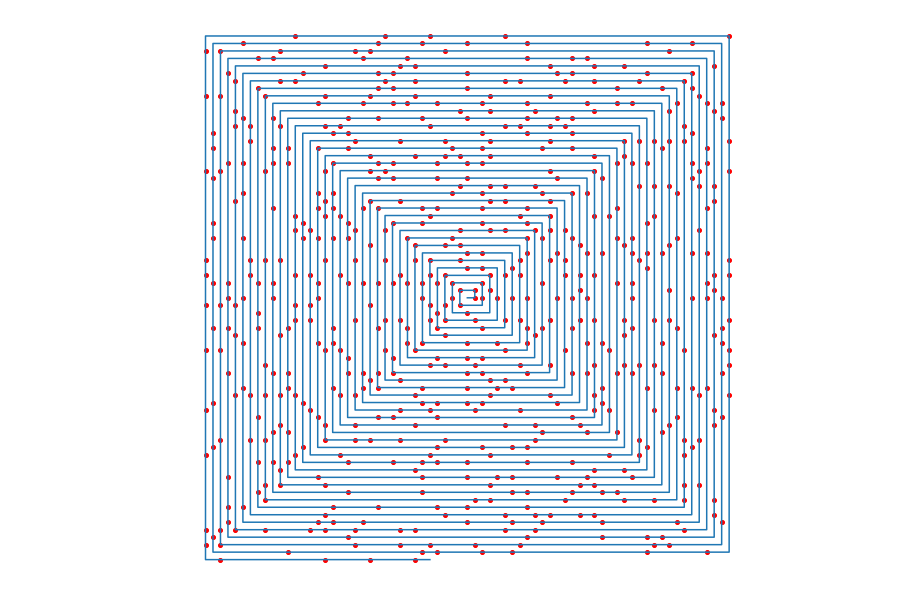

In [3]:
# Draw 5,000 points with lines
draw(5000, 4)

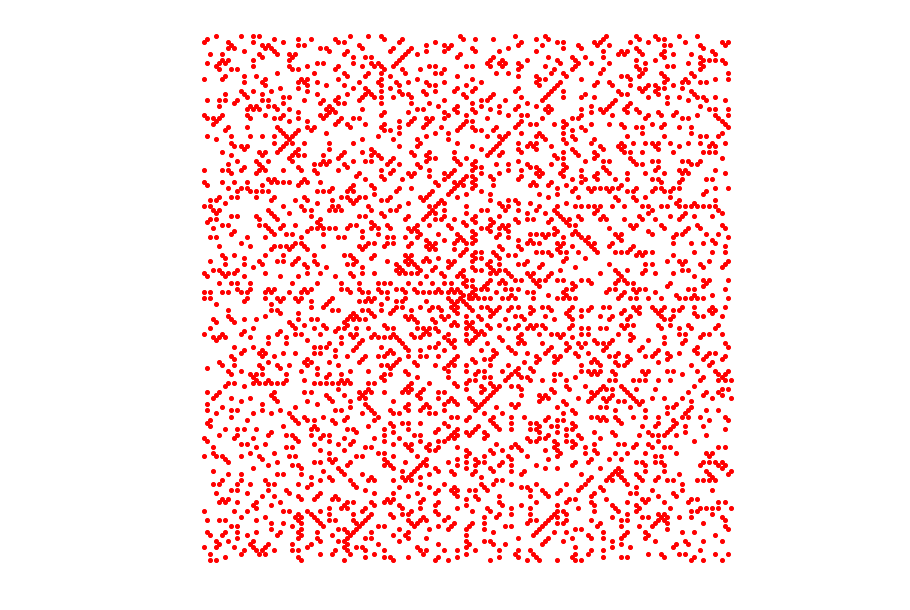

In [4]:
# Draw 30,000 numbers without lines
draw(30000, 4, lines=False)

## Triangular Prime Spiral (N=3)

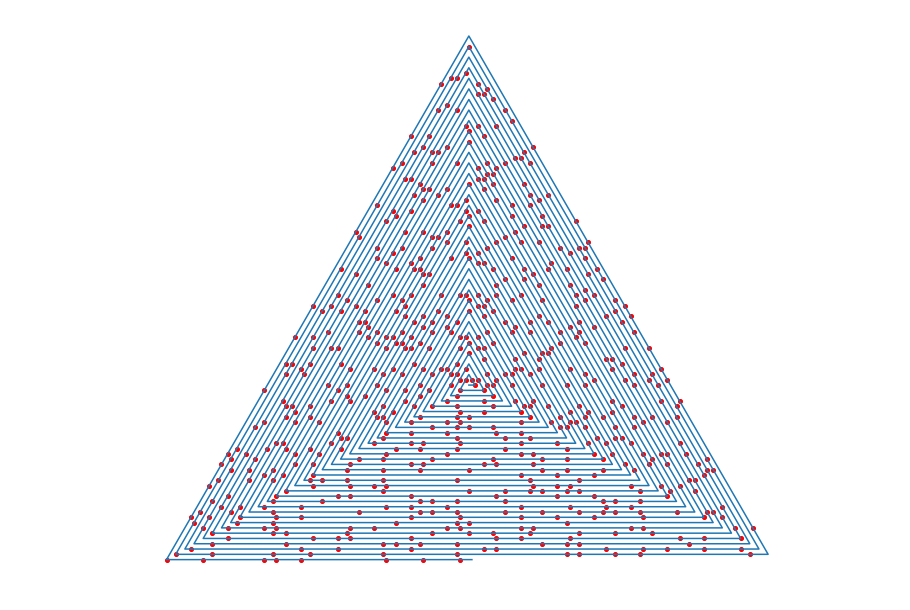

In [5]:
# Draw 5,000 points with lines
draw(5000, 3)

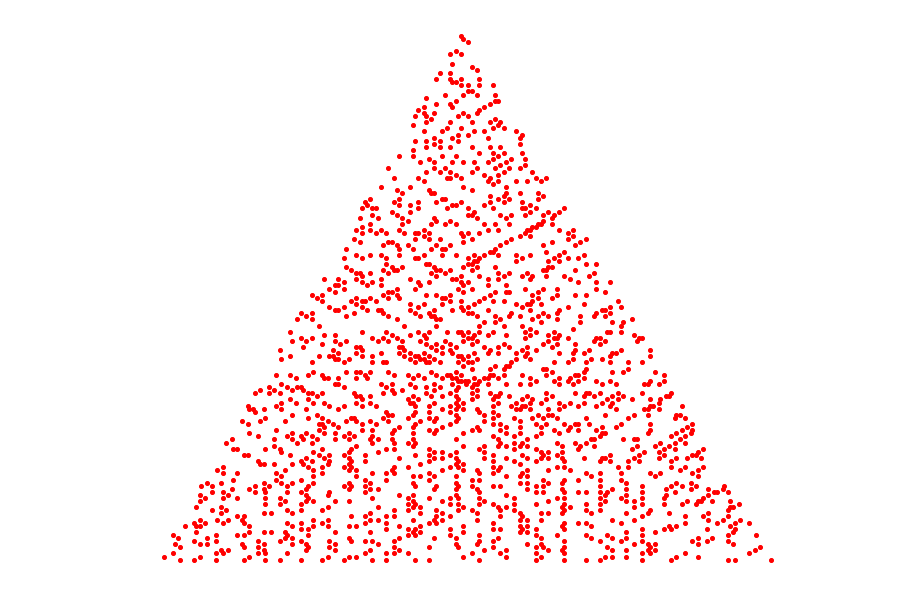

In [6]:
# Draw 15,000 numbers without lines
draw(15000, 3, lines=False)

## Hexagonal Prime Spiral (N=6)

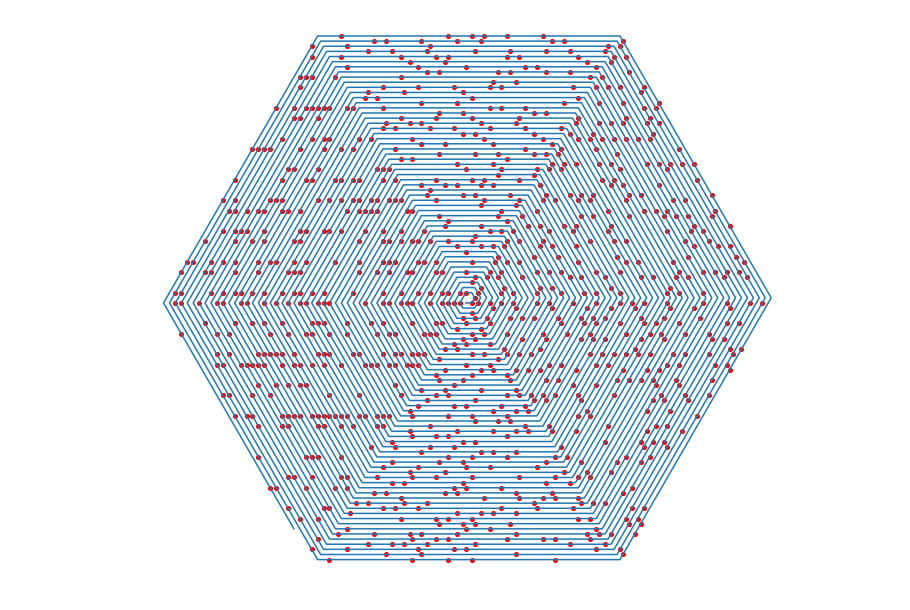

In [7]:
# Draw 8,000 points with lines
draw(8000, 6)

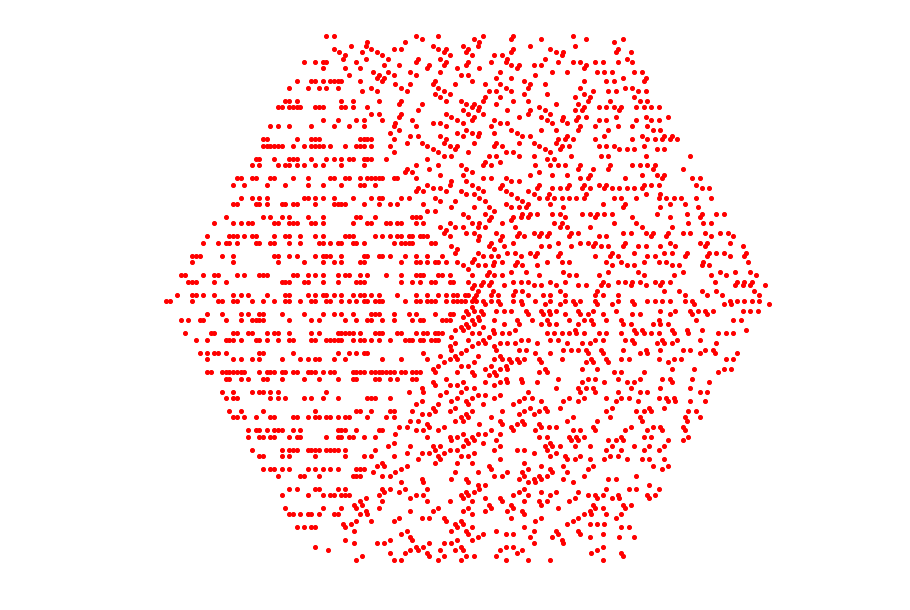

In [8]:
# Draw 20,000 numbers without lines
draw(20000, 6, lines=False)